# Project phân tích dữ liệu bán hàng

#### Năm 2019 có 12 file dữ liệu từ "sales2019_1.csv" đến "sales2019_12.csv" tương ứng với 12 file dữ liệu kinh doanh trong 12 tháng.
#### Phòng sales yêu cầu phải trả lời cho họ 5 câu hỏi: 
#### Câu 1: Tháng nào có doanh thu cao nhất và bằng bao nhiêu?
#### Câu 2: Thành phố nào có doanh thu cao nhất và bằng bao nhiêu?
#### Câu 3: Doanh nghiệp cần chạy quảng cáo vào khung giờ nào để tăng hiệu quả kinh doanh?
#### Câu 4: Sán phẩm nào được mua nhiều nhất? Giả thiết của bạn về lý do sản phẩm đó bán chạy?
#### Câu 5: Sản phẩm nào hay được bán cùng nhau?

### Import các thư viện cần thiết

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [30]:
#Đọc thử một file dữ liệu
path = "C:/Users/Administrator/Desktop/Learn_Data/Portfolio Project/PT_Sale_Analysis/"
data_frame = pd.read_csv(path + "sales2019_1.csv")
data_frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Gộp 12 file dữ liệu thành một file csv

In [52]:

data_frame_list = []
df_length_list = []

files = os.listdir(path)
for file in files:
    if file.endswith('.csv'):
        file_path = path + file
        each_df = pd.read_csv(file_path)
        data_frame_list.append(each_df)
        df = pd.concat(data_frame_list)
        length = len(each_df)
        df_length_list.append(length)
        
df.to_csv("Sales_2019.csv", index=False)
sum(df_length_list)


186850

### Xử lý dữ liệu 

In [ ]:
#df.isna().values.any() kiểm tra có giá trị NaN không
#df.isna().sum() số giá trị bị NaN
df = df.dropna(how="all")

df = df[df['Month'] != 'Or']

### Để tính doanh thu theo tháng -> tách cột tháng từ Order Date, thêm cột thành tiền của một order "total_money" 

In [124]:
#Thêm mới cột tháng

df['Month'] = df['Order Date'].str[0:2]

#Convert Quantity Order -> int, Price Each -> float, Order Date -> datetime
df = df.astype({'Price Each':'float'})
df = df.astype({'Quantity Ordered':'int'})
df['Order Date'] =  pd.to_datetime(df['Order Date'])

#Thêm column Total Money 
df['Total Money'] = df['Price Each'] * df['Quantity Ordered']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  object        
 7   Total Money       185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 12.1+ MB


In [236]:
#Thêm mới cột hours

df['Hour'] = df['Order Date'].dt.hour
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Money,Hour,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.00,21,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.95,14,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.98,13,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.99,20,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.99,11,Austin


In [233]:
#Thêm mới cột City từ Purchase Address

df['City'] = df['Purchase Address'].apply(lambda x:x.split(',')[1])
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Money,Hour,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.00,21,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.95,14,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.98,13,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.99,20,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.99,11,Austin


### Câu 1: Tháng nào có doanh thu cao nhất và bằng bao nhiêu?
Tháng 12 có doanh thu cao nhất và bằng '4613443,34 $'

In [174]:
revenues = df.groupby('Month').sum()['Total Money']
revenues.sort_values(ascending=False)
months = []

for month, revenue in revenues.items():
    months.append(month)
    
months

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

### Biểu đồ doanh thu theo tháng

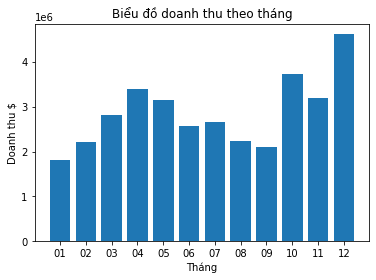

In [178]:
plt.bar(months, revenues)
plt.title("Biểu đồ doanh thu theo tháng")
plt.
plt.ylabel("Doanh thu $")
plt.xlabel("Tháng");

### Câu 2: Thành phố nào có doanh thu cao nhất và bằng bao nhiêu?
Thành phố có doanh thu cao nhất là San Francisco '8262203.91 $'

In [208]:
revenue_by_cities = df.groupby('City').sum()['Total Money']
revenue_by_cities
cities = df['City'].unique()
np.sort(cities)


array([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype=object)

In [244]:
len(cities)
np.array(cities)

array([' Boston', ' Portland', ' San Francisco', ' Los Angeles',
       ' Austin', ' Atlanta', ' Seattle', ' New York City', ' Dallas'],
      dtype=object)

### Vẽ biểu đồ doanh thu theo thành phố 

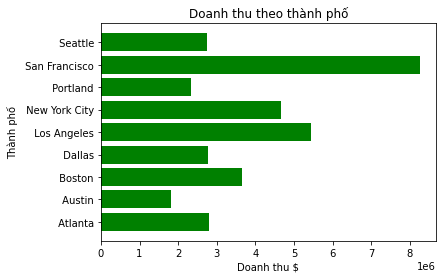

In [246]:

plt.barh(np.sort(cities), revenue_by_cities, color='g')

plt.title('Doanh thu theo thành phố')
plt.ylabel('Thành phố')
plt.xlabel('Doanh thu $');

### Câu 3: Doanh nghiệp cần chạy quảng cáo vào khung giờ nào để tăng hiệu quả kinh doanh?
TH1: Hiệu quả kinh doanh ở đây nghĩa là tại khung giờ đó bán được số lượng đơn hàng lớn nhất
TH2: Hiệu quả kinh doanh ở đây nghĩa là tại khung giờ đó có doanh thu lớn nhất

Trả lời: Về cơ bản cả 2 hướng tiếp cận đều cho kết quả tương tự như nhau. Có 2 khung giờ đạt được kết quả kinh doanh tốt nhất là 11-13h am và 18h-20h 

In [292]:
y1 = df.groupby('Hour').sum()['Total Money']
hours = np.sort(df['Hour'].unique())
y1

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Total Money, dtype: float64

In [293]:
y2 = df.groupby('Hour').count()['Order ID']
y2

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

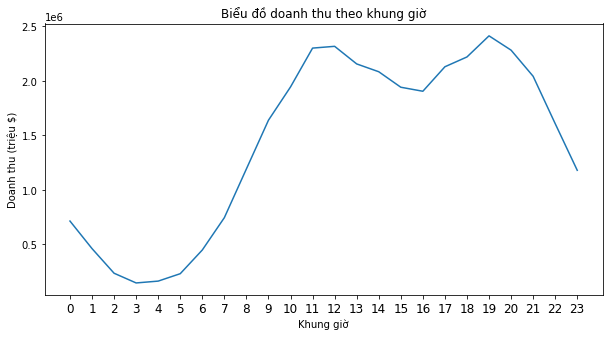

In [289]:
plt.figure(figsize=(10, 5))
plt.plot(hours, y1)
plt.title('Biểu đồ doanh thu theo khung giờ')
plt.ylabel('Doanh thu (triệu $)')
plt.xlabel('Khung giờ')
plt.xticks(hours, size=12);

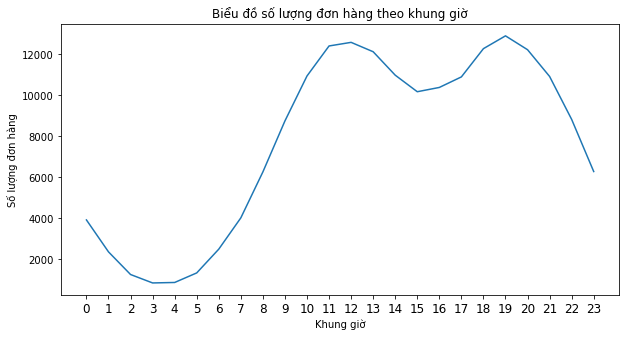

In [288]:
plt.figure(figsize=(10, 5))
plt.plot(hours, y2)
plt.title('Biểu đồ số lượng đơn hàng theo khung giờ')
plt.ylabel('Số lượng đơn hàng')
plt.xlabel('Khung giờ')
plt.xticks(hours, size=12);

### Câu 4: Sán phẩm nào được mua nhiều nhất? Giả thiết của bạn về lý do sản phẩm đó bán chạy? 
Sản phẩm bán chạy nhất là AAA Batteries (4-pack)        31017

In [306]:
qty_order = df.groupby('Product').sum()['Quantity Ordered']
products = []
for product, qty in qty_order.items():
    products.append(product)


In [314]:
avg_price = df.groupby('Product').mean()['Price Each']


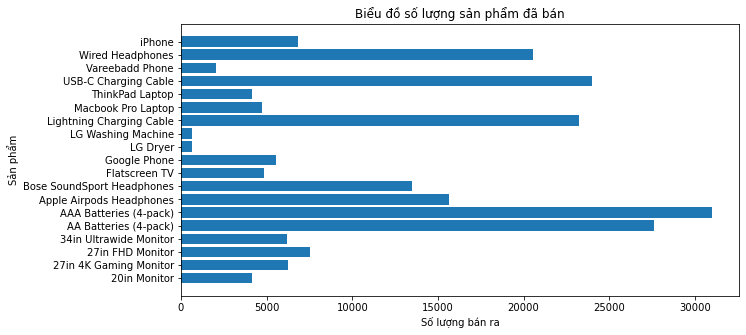

In [355]:
plt.figure(figsize=(10,5))
plt.barh(products, qty_order)
plt.title('Biểu đồ số lượng sản phẩm đã bán')
plt.ylabel('Sản phẩm')
plt.xlabel('Số lượng bán ra');

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_2900/2926286861.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation=90)


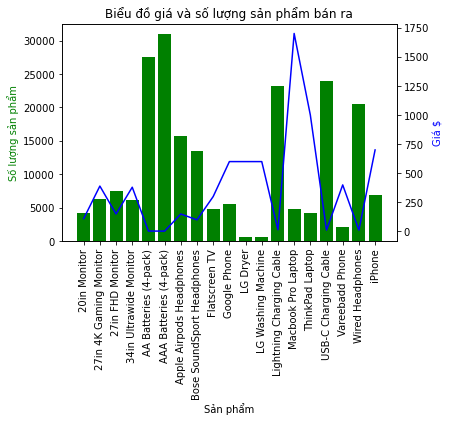

In [358]:
x = products
y1 = qty_order
y2 = avg_price
fig, ax1 = plt.subplots()
plt.title('Biểu đồ giá và số lượng sản phẩm bán ra')

ax2 = ax1.twinx()
ax1.bar(x, y1, color='green')
ax2.plot(x, y2, color='blue')

ax1.set_xlabel('Sản phẩm')
ax1.set_xticklabels(products, rotation=90)
ax1.set_ylabel('Số lượng sản phẩm', color='green')
ax2.set_ylabel('Giá $', color='blue');
